# Evaluation terminale : Machine learning & python -- Gomez Guillaume

Cet examen se compose de 3 parties : 
<ol>
  <li>Restitution théorique</li>
  <li>Restitution pratique</li>
  <li>Cas pratique</li>
</ol>

## Partie 1 : Restitution théorique

Pour cette partie, l'objectif est de décrire des notions théoriques. Essayez de rédiger des réponses claires en utilisant vos mots.

#### Question 1.1: Donner une définition du machine learning. Eviter de recopier de wikipédia, essayer d'en donner une description en quelques mots.

Réponse : traitement de données grâce à des algorithmes qui apprennent grâce à ces données

#### Question 1.2: Donner quelques applications concrètes d'utilisation du machine learning.

Réponse : Traitement et compréhension de texte, traduction, voix à texte, vision pour ordinateur, prévisions...

#### Question 1.3: Quelles sont les 2 principales familles "d'apprentissage"? Donner une rapide définition de chacune

Réponse : L'apprentissage supervisé, dans lequel nous avons une sortie voulue parmi les attributs des objets d'études et sera surtout util pour de la prédiction et compréhension des facteurs influençant la sortie.
 Et l'apprentissage non supervisé dans lequel où il n'y a pas de variables de sortie et où l'on va essayer de trouver des similarités entre les objets.

#### Question 1.4: Dans laquelle de ces familles appartient la "classification"? Le "clustering"?

Réponse : la classification appartient à la famille de l'apprentissage supervisé.
Le clustering appartient à la famille de l'apprentissage non supervisé.

#### Question 1.5: Définissez ce qu'est un arbre de décision et décrivez  de manière simple sa construction.

Réponse : Un arbre de décision est un ensemble de nœud représentant chacun un test sur un attribut de l'objet en entrée. Chaque feuille est une partie de la sortie y.
Pour construire cet arbre, on part de la racine avec 100% du set d'entrainement. Si le nœud n'est pas pur, ie tous les objets du nœud n'ont pas la même sortie y, alors on soumet les objets du nœud à un test sur un de leurs attributs. Si le nœud est pur, le transformer en feuille et répéter jusqu'à n'avoir que des feuilles sur les branches les plus basses.

#### Question 1.6: Dans quelle situation parle-t-on "d'overfitting"?

Réponse : lorsque le modèle entrainé est extrêmement performant sur le set d'entrainement, mais l'est très peu sur celui de test.

## Partie 2 : Etude d'un cas pratique

Pour cette partie, vous devrez vous inspirer des TP réalisés en cours. 

Il vous faut importer les librairies qui vous seront nécessaires répondre à la problèmatique dans la cellule suivante :

In [1]:
# packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
#...
from pandas_profiling import ProfileReport



Importez les données comme suit :

In [2]:
data = pd.read_csv('nba_logreg.csv')

Ce jeu de données décrit les caracteristiques de jeu de joueurs de Basketball au sein de la NBA. La variable d'intérêt Y est "TARGET_5yrs". La description de ce dataset se trouve dans le fichier "NBA_variables_doc.png"

__L'objectif du problème est de réussir à prédire si un jeune joueur durera plus ou moins que 5ans au sein de la ligue.__

In [3]:
data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.1: Donnez au moins une colonne qui doit être enlevé du jeu de données. Pourquoi? 

Réponse : la colonne nom du joueur, car s'appeler Jordan ne fera pas obligatoirement de vous une superstar.

#### Exercice 2.1: Enlevez les variables du dataset qui vous semble inutile au problème.

In [4]:
data.drop(labels=['Name'], axis=1, inplace=True)
data

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.2: Ce dataset contient - il des données manquantes ou non exploitable?

In [5]:
#stats = ProfileReport(data)

In [6]:
#stats

Réponse : Oui

#### Exercice 2.2: Si oui, donnez en la proportion par colonne.

In [7]:
print(data.isnull().sum())

GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64


In [8]:
data.dropna(inplace=True)

#### Exercice 2.3: Séparez les données en 2 échantillons train-test

In [9]:
y = data['TARGET_5Yrs']
x = data.drop(labels=['TARGET_5Yrs'], axis=1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

#### Question 2.3: Pourquoi cette étape est-elle indispensable?

Réponse : Afin d'avoir un set d'entrainement et un set de test pour mesurer la qualité du modèle.

#### Exercice 2.4: Entrainez sur ces données un arbre de décision. Calculer une prédiction.

In [11]:
classifier = DecisionTreeClassifier()
model = classifier.fit(x_train, y_train)

In [18]:
#prédiction
predict = model.predict(x_test)
predict

array([1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.])

#### Exercice 2.5: Evaluez la qualité du modèle.

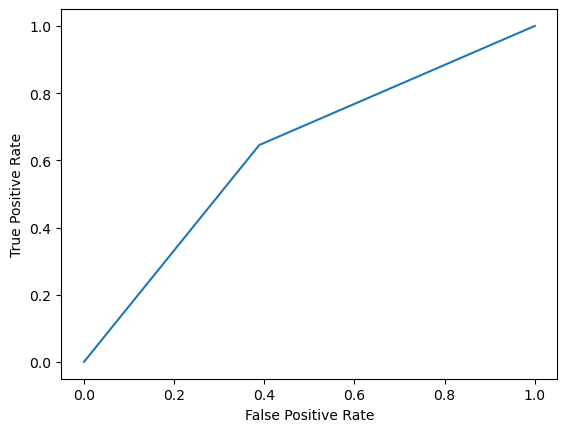

In [19]:
fpr, tpr, _ = roc_curve(y_test, predict)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
print(auc(fpr,tpr))

0.6283403656821378


#### Question 2.4: Quelle métrique utilisez vous? Pourquoi? 

Réponse : la roc curve pour observer le taux de vrai positifs en fonction des faux positifs et l'auc.

#### Question 2.5: Le modèle construit est-il de qualité satisfaisante? Expliquez.

Réponse : avec la courbe ROC précédente et l'auc, le modèle n'est pas très bon. (plus l'auc est proche de 1, mieux c'est)

#### Exercice 2.6: Produisez une visualisation graphique de l'arbre construit

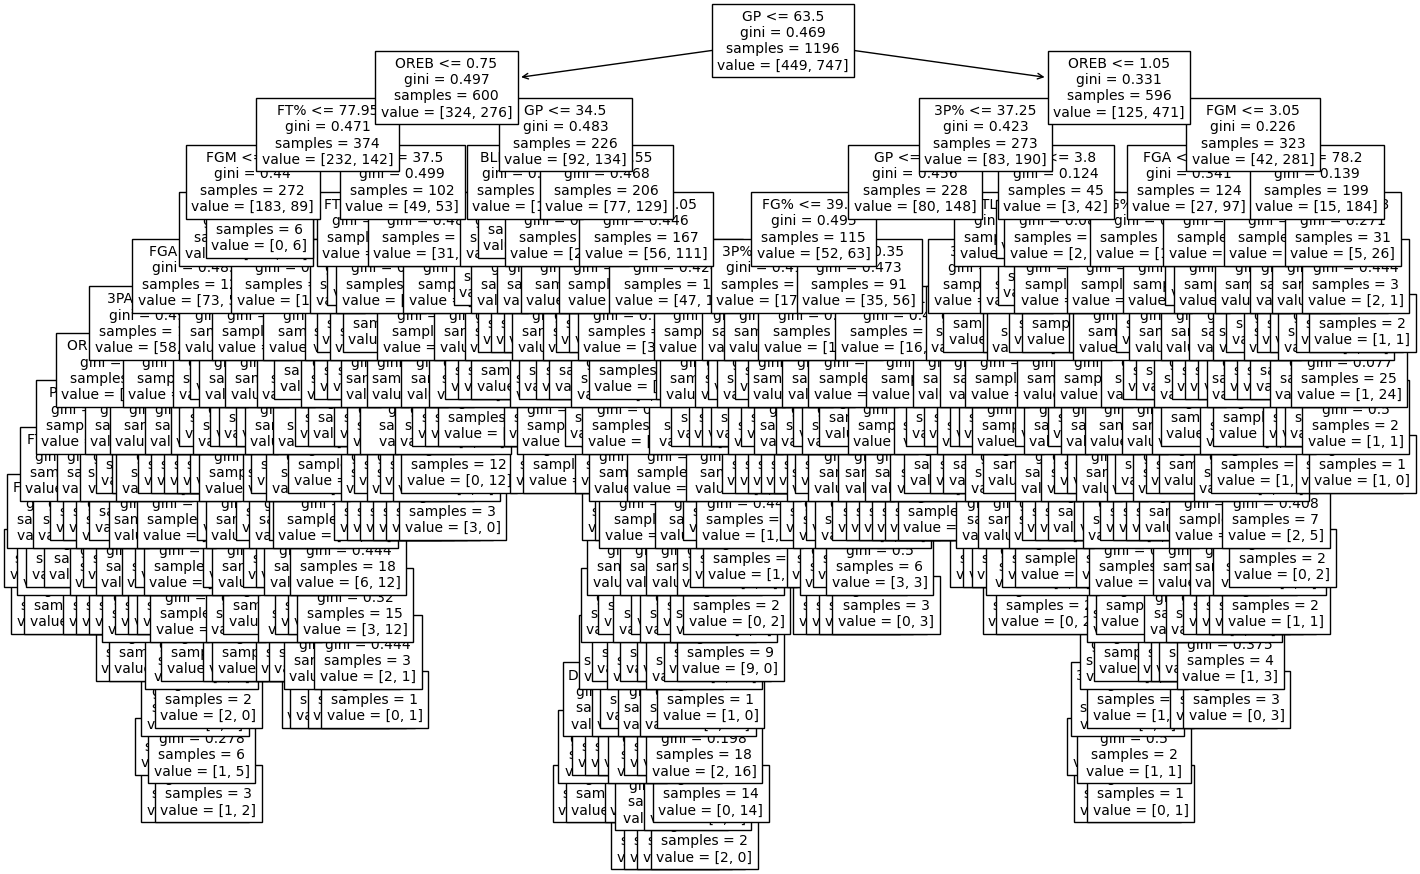

In [22]:
plt.figure(figsize=(17,11))
plot_tree(model, feature_names = list(x_train.columns), fontsize=10)
plt.show()

#### Question 2.6: Donnez un exemple de lecture d'un tel arbre.

Réponse : Partant de la racine (haut), on commence à séparer le set initial en 2 selon l'attribut OREB, et ainsi de suite.

#### Question 2.7: Comment peut - on améliorer la qualité du modèle? Donnez au moins 3 méthodes:

Réponse : Affiner les attributs, utilisation d'hyper-paramètres

#### Exercice 2.7: Essayer d'appliquer une de ces méthodes

In [19]:
# code..

#### Question 2.8: Concluez

Réponse